In [1]:
import numpy as np
import pandas as pd
import tweepy 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")

In [2]:
consumer_key= "Rs8jfj4kTOn3vnYRJe8itLijT"
consumer_secret= "vgaPay68b3p313e2Du68Q5kLEKdHE62QxKm5NhTxXTucfWZOFv"

access_token= "1514159034261467142-SJrSAdsOdVxS0RGQtOjZN1mYhNKPXq"
access_token_secret= "hXGOpWbXEVslwnqQkkNHjejlbeUJvwkpDQIZerPM2WKdJ"

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
limit = 3000
tweets = "#amazon" #cahnge the to retrive the data from snapdeal and flipkart and run the code from this step to save .csv
tweets = tweepy.Cursor(api.search_tweets,q=tweets,lang="en",count=455).items(limit)   

In [5]:
users_locs = [[tweet.user.screen_name,tweet.text] for tweet in tweets]

In [6]:
data = pd.DataFrame(data=users_locs,columns=['user',"text"])
data

,user,text
0,DanielleBeave20,RT @techmidschteach: Every little bit helps. W...
1,KatieMettner,RT @JohnMeadAuthor: ⭐️⭐️⭐️⭐️⭐️ #book #series #...
2,KatieMettner,RT @OkroguLes: Check out my Gig on Fiverr: pro...
3,happy0shopping,Carlinkit 4.0 Wireless CarPlay Android Auto 2 ...
4,shopshop_shop_,12000mAh Rechargeable Li-ion Battery GSP093113...
...,...,...
2995,BestDealsAlert,Stride Rite Girls M2P Journey Athletic Sneaker...
2996,BestDealsAlert,Bandolino Women’s Mandie Signature Fit High Ri...
2997,BestDealsAlert,"Clarks Women’s Slingback Sling Back Sandals, 4..."
2998,falcodrin,🔥 AMAZON : ASUS GeForce RTX 3080 ROG STRIX OC ...


In [7]:
data.to_csv("finalamazondata.csv",index=False)#for snapdeal only this much data available

# DATA CLEANING

In [8]:
import os
os.chdir(r"C:\Users\ANIKET\sentiment analysis")

In [9]:
df1 = pd.read_csv("finalamazondata.csv")
df2 = pd.read_csv("finalflipkartdata.csv")
df3 = pd.read_csv("finalsnapdealdata.csv")

In [10]:
print(df1.head())
print(f"NUMBER OF ROWS = {df1.shape[0]} NUMBER OF COLUMNS = {df1.shape[1]}")

              user                                               text
0  DanielleBeave20  RT @techmidschteach: Every little bit helps. W...
1     KatieMettner  RT @JohnMeadAuthor: ⭐️⭐️⭐️⭐️⭐️ #book #series #...
2     KatieMettner  RT @OkroguLes: Check out my Gig on Fiverr: pro...
3   happy0shopping  Carlinkit 4.0 Wireless CarPlay Android Auto 2 ...
4   shopshop_shop_  12000mAh Rechargeable Li-ion Battery GSP093113...
NUMBER OF ROWS = 3000 NUMBER OF COLUMNS = 2


In [11]:
print(df2.head())
print(f"NUMBER OF ROWS = {df2.shape[0]} NUMBER OF COLUMNS = {df2.shape[1]}")

              user                                               text  \
0      Shubhra1108  RT @Shubhra1108: @GHMCOnline why are on-line d...   
1      Dev46225962  #flipkart #flipkartsupport #flipkarfraud Day 5...   
2  NitishK73134191  Damaged products received by flipkart. But fli...   
3      Zubairmaani  @Flipkart  where is my Order...!?\nNo response...   
4    VikasSSongara  RT @ubsforums: We are elated to welcome our em...   

   retweeted_status  
0             False  
1             False  
2             False  
3             False  
4             False  
NUMBER OF ROWS = 2645 NUMBER OF COLUMNS = 3


In [12]:
print(df3.head())
print(f"NUMBER OF ROWS = {df3.shape[0]} NUMBER OF COLUMNS = {df3.shape[1]}")

             user                                               text
0        sadasemb  RT @snapdeal: Introducing Aragma's amazing hai...
1     MSA91856940  RT @Sky9_8: When you don't know the facts\n\nP...
2    BizzBuzzNews  Lemme Be eyes Rs. 30-cr turnover #LemmeBe #Dev...
3   Snapdeal_Help  @SagarBunki1899 Hi! Please “Private Message” u...
4  SagarBunki1899  @snapdeal how can i login with email in which ...
NUMBER OF ROWS = 1055 NUMBER OF COLUMNS = 2


In [13]:
amazon = pd.DataFrame(df1["text"])
flipkart = pd.DataFrame(df2["text"])
snapdeal = pd.DataFrame(df3["text"])

In [14]:
amazon.head()

,text
0,RT @techmidschteach: Every little bit helps. W...
1,RT @JohnMeadAuthor: ⭐️⭐️⭐️⭐️⭐️ #book #series #...
2,RT @OkroguLes: Check out my Gig on Fiverr: pro...
3,Carlinkit 4.0 Wireless CarPlay Android Auto 2 ...
4,12000mAh Rechargeable Li-ion Battery GSP093113...


In [15]:
flipkart.head(15)

,text
0,RT @Shubhra1108: @GHMCOnline why are on-line d...
1,#flipkart #flipkartsupport #flipkarfraud Day 5...
2,Damaged products received by flipkart. But fli...
3,@Flipkart where is my Order...!?\nNo response...
4,RT @ubsforums: We are elated to welcome our em...
5,Damaged products received by flipkart but not ...
6,@flipkartsupport This is happening in every sm...
7,@venkateshyalava @CKsays_ @AjayKum43545844 @kr...
8,@flipkartsupport No you haven't as e-mail whic...
9,RT @CustomerAwarens: #RETWEEET \nकृपया 🙏 कुछ द...


In [16]:
snapdeal.head()

,text
0,RT @snapdeal: Introducing Aragma's amazing hai...
1,RT @Sky9_8: When you don't know the facts\n\nP...
2,Lemme Be eyes Rs. 30-cr turnover #LemmeBe #Dev...
3,@SagarBunki1899 Hi! Please “Private Message” u...
4,@snapdeal how can i login with email in which ...


In [17]:
print("not all the lowecases in amazon :".upper(),amazon.iloc[10])

print("*"*20)

print("not all the lowecases in flipkart:".upper(),flipkart.iloc[10])

print("*"*20)

print("not all the lowecases in snapdeal:".upper(),snapdeal.iloc[10])

NOT ALL THE LOWECASES IN AMAZON : text    Anne Klein Women’s Glitter-Accented Bangle Wat...
Name: 10, dtype: object
********************
NOT ALL THE LOWECASES IN FLIPKART: text    RT @sidevupp: दोस्तों अगर आप ऑनलाइन शॉपिंग करन...
Name: 10, dtype: object
********************
NOT ALL THE LOWECASES IN SNAPDEAL: text    RT @Gauravayusi: @1kunalbahl @Snapdeal_Help @s...
Name: 10, dtype: object


In [18]:
amazon['text'] = amazon['text'].str.lower()
print("all the lowercase :".upper(),amazon.iloc[10])

print("*"*20)

flipkart['text'] = flipkart['text'].str.lower()
print("all the lowercase :".upper(),flipkart.iloc[10])

print("*"*20)

snapdeal['text'] = snapdeal['text'].str.lower()
print("all the lowercase :".upper(),snapdeal.iloc[10])

ALL THE LOWERCASE : text    anne klein women’s glitter-accented bangle wat...
Name: 10, dtype: object
********************
ALL THE LOWERCASE : text    rt @sidevupp: दोस्तों अगर आप ऑनलाइन शॉपिंग करन...
Name: 10, dtype: object
********************
ALL THE LOWERCASE : text    rt @gauravayusi: @1kunalbahl @snapdeal_help @s...
Name: 10, dtype: object


In [19]:
amazon["text"] = amazon["text"].str.replace("rt","")
flipkart["text"] = flipkart["text"].str.replace("rt","")
snapdeal["text"] = snapdeal["text"].str.replace("rt","")

In [20]:
amazon.iloc[10]

text    anne klein women’s glitter-accented bangle wat...
Name: 10, dtype: object

In [21]:
#removeing numbers and websites from string
amazon['text'] = amazon['text'].str.replace(r'http\S+|www.\S+','')
amazon['text'] = amazon['text'].str.replace("\d+","")

flipkart['text'] = flipkart['text'].str.replace(r'http\S+|www.\S+','')
flipkart['text'] = flipkart['text'].str.replace("\d+","")


snapdeal['text'] = snapdeal['text'].str.replace(r'http\S+|www.\S+','')
snapdeal['text'] = snapdeal['text'].str.replace("\d+","")

In [22]:
print(amazon.iloc[10])
print(flipkart.iloc[10])
print(snapdeal.iloc[10])

text    anne klein women’s glitter-accented bangle wat...
Name: 10, dtype: object
text     @sidevupp: दोस्तों अगर आप ऑनलाइन शॉपिंग करने ...
Name: 10, dtype: object
text     @gauravayusi: @kunalbahl @snapdeal_help @snap...
Name: 10, dtype: object


In [23]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
def remove_punctuation(text):
    nopunct="".join([i  for i in text if i not in string.punctuation])
    return nopunct

In [25]:
#did this step just because i was getting the error that "float" object can't iterate
amazon["text"] = amazon["text"].astype(str)

In [26]:
amazon['text']= amazon['text'].apply(lambda x :remove_punctuation(x))
print(amazon.iloc[10])

text    anne klein women’s glitteraccented bangle watc...
Name: 10, dtype: object


In [27]:
flipkart['text']= flipkart['text'].apply(lambda x :remove_punctuation(x))
print(flipkart.iloc[10])

text     sidevupp दोस्तों अगर आप ऑनलाइन शॉपिंग करने की...
Name: 10, dtype: object


In [28]:
snapdeal['text']= snapdeal['text'].apply(lambda x :remove_punctuation(x))
print(snapdeal.iloc[10])

text     gauravayusi kunalbahl snapdealhelp snapdeal \...
Name: 10, dtype: object


In [29]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANIKET\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
#removing stopwords
amazon['text'] = amazon['text'].apply(lambda x: ' '.join([abc for abc in x.split() if abc not in (stop)]))
print('without any  stopwords :'.upper() ,amazon.iloc[45,0])

WITHOUT ANY  STOPWORDS : beginning fabrics southwest jason yenter cactus blooms inches via amazon amazon


In [31]:
flipkart['text'] = flipkart['text'].apply(lambda x: ' '.join([abc for abc in x.split() if abc not in (stop)]))
print('without any  stopwords :'.upper() ,flipkart.iloc[45,0])

WITHOUT ANY  STOPWORDS : flipka dont shop electronic item flipka lack somewhere directly going blame co…


In [32]:
snapdeal['text'] = snapdeal['text'].apply(lambda x: ' '.join([abc for abc in x.split() if abc not in (stop)]))
print('without any  stopwords :'.upper() ,snapdeal.iloc[45,0])

WITHOUT ANY  STOPWORDS : sanjay always request customers never share personal details publicly page visib…


In [33]:
import re 
words = set(nltk.corpus.words.words()) 
words

{'toolmaking',
 'monoestrous',
 'acrogenously',
 'gurgeon',
 'parasitotropism',
 'undecree',
 'hippocrepiform',
 'thalamotegmental',
 'pragmatical',
 'Autosauri',
 'polarizer',
 'polyaxonic',
 'misrecite',
 'bifidity',
 'peaker',
 'bromphenol',
 'berthed',
 'oxan',
 'exampleship',
 'nondisarmament',
 'panglessly',
 'pillbox',
 'sert',
 'Diplospondyli',
 'huggermuggery',
 'tissueless',
 'leprously',
 'unjointed',
 'noncommunicable',
 'ruralization',
 'proteosome',
 'phosphorhidrosis',
 'gossipry',
 'counterfallacy',
 'superresponsible',
 'dolabra',
 'expansible',
 'cyanocarbonic',
 'procural',
 'Sturninae',
 'ventriculous',
 'electrothermometer',
 'procurate',
 'dolichocephal',
 'ethene',
 'twinism',
 'Torontonian',
 'phanerocodonic',
 'ventrotomy',
 'hotheaded',
 'unarresting',
 'murmurously',
 'operosely',
 'frightfulness',
 'Tuba',
 'unboarded',
 'unspeared',
 'kindhearted',
 'mesepimeral',
 'subnex',
 'grandfatherless',
 'maximed',
 'lymphocystosis',
 'respectworthy',
 'jumblingly',

In [34]:
def clean_text(text):
    text = re.sub("amazon|flipkart|snapdeal","",text)
    text = re.sub("sale|offer","",text)
    text = re.sub("\b[a-zA-Z]\b","",text)
    text = re.sub("\b[a-zA-Z][a-zA-Z]\b","",text)
    text = re.sub("\n","",text)
    text = " ".join(i for i in nltk.wordpunct_tokenize(text) if i.lower() in words)
    return text

In [35]:
amazon["text"] = amazon["text"].apply(lambda x: clean_text(x))
amazon.iloc[45]

text    beginning southwest via
Name: 45, dtype: object

In [36]:
flipkart["text"] = flipkart["text"].apply(lambda x: clean_text(x))
flipkart.iloc[45]

text    dont shop electronic item lack somewhere direc...
Name: 45, dtype: object

In [37]:
snapdeal["text"] = snapdeal["text"].apply(lambda x: clean_text(x))
snapdeal.iloc[45]

text    always request never share personal publicly page
Name: 45, dtype: object

In [38]:
amazon.head()

,text
0,every little bit help clear list
1,book series authentic believable humane brilli...
2,check gig promote handmade vintage
3,wireless android auto wireless adapter ford ho...
4,battery speaker


In [39]:
flipkart.head()

,text
0,suspended pin code
1,day know slipper went refund th
2,received refund money back order
3,order response product still today
4,elated welcome eminent speaker exclusive th ed...


In [40]:
snapdeal.head()

,text
0,amazing range hair available shop a
1,sky dont know
2,turnover
3,hi please private message us contact number li...
4,login old mobile attached old number


In [41]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
word_token = nltk.tokenize.WhitespaceTokenizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ANIKET\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:
def lemmatize(text):
    return[lemmatizer.lemmatize(i,"v") for i in word_token.tokenize(text)]

In [43]:
amazon["text"] = amazon["text"].apply(lambda x:' '.join(lemmatize(x)))
amazon.iloc[45]

text    begin southwest via
Name: 45, dtype: object

In [44]:
flipkart["text"] = flipkart["text"].apply(lambda x:' '.join(lemmatize(x)))
flipkart.iloc[45]

text    dont shop electronic item lack somewhere direc...
Name: 45, dtype: object

In [45]:
snapdeal["text"] = snapdeal["text"].apply(lambda x:' '.join(lemmatize(x)))
snapdeal.iloc[45]

text    always request never share personal publicly page
Name: 45, dtype: object

In [46]:
#removing extra white space from right side
amazon["text"] = amazon["text"].astype("str").str.rstrip()
flipkart["text"] = flipkart["text"].astype("str").str.rstrip()
snapdeal["text"] = snapdeal["text"].astype("str").str.rstrip()

In [47]:
#removing extra white space from left side
amazon["text"] = amazon["text"].astype("str").str.lstrip()
flipkart["text"] = flipkart["text"].astype("str").str.lstrip()
snapdeal["text"] = snapdeal["text"].astype("str").str.lstrip()

In [48]:
flipkart.head(20)#we have blank rows which need to be remove

,text
0,suspend pin code
1,day know slipper go refund th
2,receive refund money back order
3,order response product still today
4,elate welcome eminent speaker exclusive th edi...
5,receive refund money back id od
6,happen every specify mine stop silly
7,
8,havent suppose send receive till fraud
9,


In [49]:
amazon["text"].replace('', np.nan, inplace=True)
flipkart["text"].replace('', np.nan, inplace=True)
snapdeal["text"].replace('', np.nan, inplace=True)

In [50]:
flipkart.head(20)

,text
0,suspend pin code
1,day know slipper go refund th
2,receive refund money back order
3,order response product still today
4,elate welcome eminent speaker exclusive th edi...
5,receive refund money back id od
6,happen every specify mine stop silly
7,NaN
8,havent suppose send receive till fraud
9,NaN


In [51]:
print("null values in amazon dataset : " ,amazon["text"].isnull().sum())
print("null values in flipkart dataset : " ,flipkart["text"].isnull().sum())
print("null values in snapdeal dataset : " ,snapdeal["text"].isnull().sum())

null values in amazon dataset :  10
null values in flipkart dataset :  206
null values in snapdeal dataset :  9


In [52]:
amazon.dropna(inplace=True)
flipkart.dropna(inplace=True)
snapdeal.dropna(inplace=True)

In [53]:
print("null values in amazon dataset : " ,amazon["text"].isnull().sum())
print("null values in flipkart dataset : " ,flipkart["text"].isnull().sum())
print("null values in snapdeal dataset : " ,snapdeal["text"].isnull().sum())

null values in amazon dataset :  0
null values in flipkart dataset :  0
null values in snapdeal dataset :  0


In [54]:
flipkart.head(20)

,text
0,suspend pin code
1,day know slipper go refund th
2,receive refund money back order
3,order response product still today
4,elate welcome eminent speaker exclusive th edi...
5,receive refund money back id od
6,happen every specify mine stop silly
8,havent suppose send receive till fraud
11,rog phone via
12,note sir poor experience surely let get away t


In [55]:
#using BOW to convert the text into the vectors 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words="english")

# AMAZON

In [56]:
amazon_cv = cv.fit_transform(amazon["text"])
amazon_tdm = pd.DataFrame(amazon_cv.toarray(), columns=cv.get_feature_names())
amaztdm =amazon_tdm.T
amaztdm

,0,1,2,3,4,5,6,7,8,9,...,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandonment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolute,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absorption,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zip,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zipper,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zombie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#checking the frequency of the words 
amaztdm["frequency"] = amaztdm.sum(axis=1)
amaztdm.head()

,0,1,2,3,4,5,6,7,8,9,...,2981,2982,2983,2984,2985,2986,2987,2988,2989,frequency
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
abandonment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
absent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
absolute,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
absorption,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
amaztdm.reset_index(inplace=True)
amaztdm.head()

,index,0,1,2,3,4,5,6,7,8,...,2981,2982,2983,2984,2985,2986,2987,2988,2989,frequency
0,aa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,abandonment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,absent,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,absolute,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,absorption,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
#just taking the two main cloumns to analyise the number of occurrence in the data
amaztdm1 = amaztdm[["index","frequency"]]
amaztdm1.rename(columns={"index" : "words"},inplace=True)
amaztdm1.sort_values(by="frequency",ascending=False,inplace=True)
amaztdm1.head(10)

,words,frequency
1334,link,399
974,game,199
1433,men,170
2634,win,167
238,book,152
843,fan,134
498,contest,133
2647,wireless,129
1905,replacement,122
2513,vacuum,113


In [60]:
#it shows that link are trending on amazon

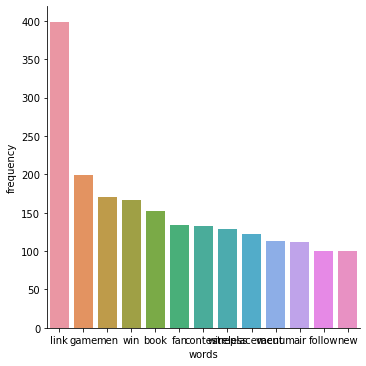

In [61]:
a = amaztdm1[amaztdm1["frequency"] >= 100]
s1 = sns.factorplot(x="words",y="frequency",kind="bar",data=a)

# FLIPKART

In [62]:
flipkart_cv = cv.fit_transform(flipkart["text"])
flipkart_tdm = pd.DataFrame(flipkart_cv.toarray(), columns=cv.get_feature_names())
fliptdm = flipkart_tdm.T
fliptdm

,0,1,2,3,4,5,6,7,8,9,...,2429,2430,2431,2432,2433,2434,2435,2436,2437,2438
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolute,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abstract,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
academy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
yoga,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
youth,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
youve,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
#checking the frequency of the words 
fliptdm["frequency"] = fliptdm.sum(axis=1)
fliptdm.head()

,0,1,2,3,4,5,6,7,8,9,...,2430,2431,2432,2433,2434,2435,2436,2437,2438,frequency
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
absolute,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
abstract,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
academy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
fliptdm.reset_index(inplace=True)
fliptdm.head()

,index,0,1,2,3,4,5,6,7,8,...,2430,2431,2432,2433,2434,2435,2436,2437,2438,frequency
0,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
1,absolute,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,absolutely,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,abstract,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,academy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [65]:
#just taking the two main cloumns to analyise the number of occurrence in the data
fliptdm1 = fliptdm[["index","frequency"]]
fliptdm1.rename(columns={"index" : "words"},inplace=True)
fliptdm1.sort_values(by="frequency",ascending=False,inplace=True)
fliptdm1.head(10)

,words,frequency
1303,shop,538
860,loot,505
539,fashion,476
134,beauty,473
1004,order,343
1100,prime,268
596,free,144
867,love,137
1112,product,135
786,kindle,133


In [66]:
#fashion are trending on flipkart

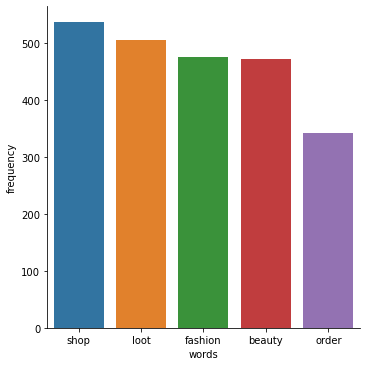

In [67]:
f = fliptdm1[fliptdm1["frequency"] >= 300]
s2 = sns.factorplot(x="words",y="frequency",kind="bar",data=f)

# SNAPDEAL

In [68]:
snapdeal_cv = cv.fit_transform(snapdeal["text"])
snapdeal_tdm = pd.DataFrame(snapdeal_cv.toarray(), columns=cv.get_feature_names())
snaptdm = snapdeal_tdm.T
snaptdm

,0,1,2,3,4,5,6,7,8,9,...,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
access,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accord,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
account,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accuse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
year,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yesterday,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
youve,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
#checking the frequency of the words 
snaptdm["frequency"] = snaptdm.sum(axis=1)
snaptdm.head()

,0,1,2,3,4,5,6,7,8,9,...,1037,1038,1039,1040,1041,1042,1043,1044,1045,frequency
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
access,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
accord,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
account,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
accuse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [70]:
snaptdm.reset_index(inplace=True)
snaptdm.head()

,index,0,1,2,3,4,5,6,7,8,...,1037,1038,1039,1040,1041,1042,1043,1044,1045,frequency
0,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,access,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,accord,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
3,account,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,accuse,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [71]:
#just taking the two main cloumns to analyise the number of occurrence in the data
snaptdm1 = snaptdm[["index","frequency"]]
snaptdm1.rename(columns={"index" : "words"},inplace=True)
snaptdm1.sort_values(by="frequency",ascending=False,inplace=True)
snaptdm1.head(10)

,words,frequency
313,know,430
183,dont,416
539,sky,391
275,help,195
592,thank,118
277,hi,117
583,team,74
399,order,65
601,time,53
524,share,52


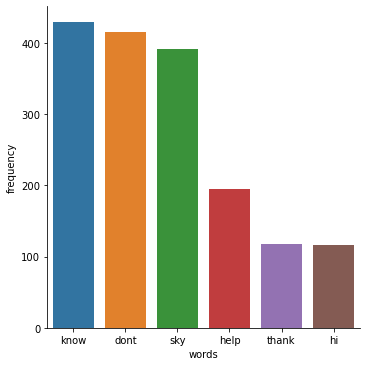

In [72]:
s = snaptdm1[snaptdm1["frequency"] >= 100]
s3 = sns.factorplot(x="words",y="frequency",kind="bar",data=s)

In [73]:
amazon_text = " ".join(i for i in amazon["text"])
print(f"There are {len(amazon_text)} in the amazon")

There are 124844 in the amazon


In [74]:
flipkart_text = " ".join(i for i in flipkart["text"])
print(f"There are {len(flipkart_text)} in the flipkart")

There are 84766 in the flipkart


In [75]:
snapdeal_text = " ".join(i for i in snapdeal["text"])
print(f"There are {len(snapdeal_text)} in the snapdeal")

There are 31181 in the snapdeal


# wordcloud for AMAZON

In [76]:
stopwords = set(STOPWORDS)

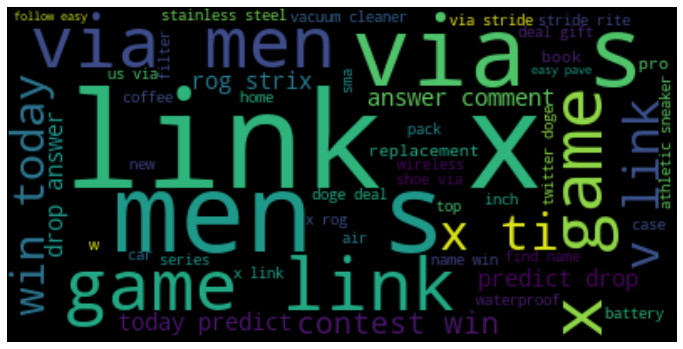

In [77]:
amazonwordcloud = WordCloud(stopwords=stopwords,background_color="black",collocations=True,max_words=50).generate(amazon_text)
plt.figure(figsize=(12,8))
plt.imshow(amazonwordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

# wordcloud for FLIPKART

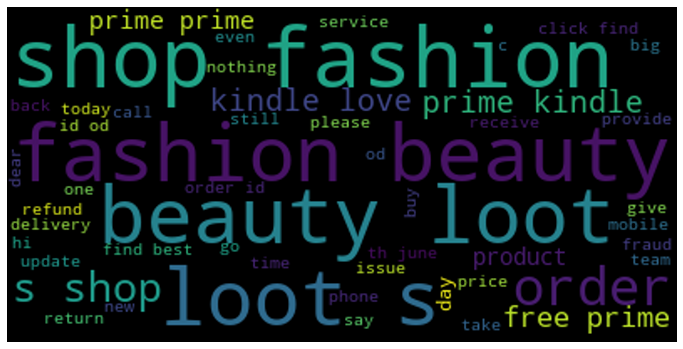

In [78]:
flipkartwordcloud = WordCloud(stopwords=stopwords,background_color="black",collocations=True,max_words=50).generate(flipkart_text)
plt.figure(figsize=(12,8))
plt.imshow(flipkartwordcloud,interpolation='spline16')
plt.axis("off")
plt.show()

# wordcloud for SNAPDEAL

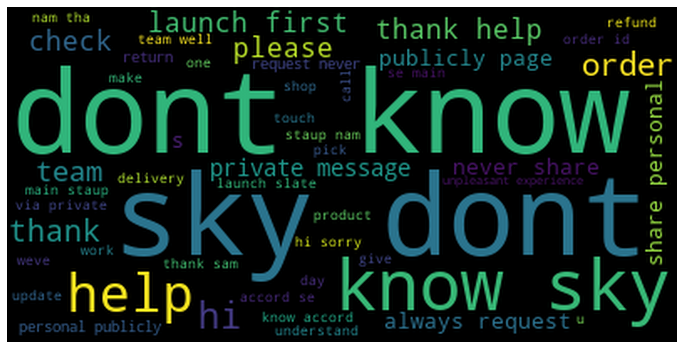

In [79]:
snapdealwordcloud = WordCloud(stopwords=stopwords,background_color="black",collocations=True,max_words=50).generate(snapdeal_text)
plt.figure(figsize=(12,8))
plt.imshow(snapdealwordcloud,interpolation="lanczos")
plt.axis("off")
plt.show()

In [80]:
print("duplicates in amazon data : ",amazon.duplicated().sum())
print("duplicates in flipkart data : ",flipkart.duplicated().sum())
print("duplicates in snapdeal data : ",snapdeal.duplicated().sum())

duplicates in amazon data :  1023
duplicates in flipkart data :  744
duplicates in snapdeal data :  543


In [81]:
amazon.drop_duplicates(inplace=True,keep="first") 
flipkart.drop_duplicates(inplace=True,keep="first") 
snapdeal.drop_duplicates(inplace=True,keep="first") 

In [82]:
print("duplicates in amazon data : ",amazon.duplicated().sum())
print("duplicates in flipkart data : ",flipkart.duplicated().sum())
print("duplicates in snapdeal data : ",snapdeal.duplicated().sum())

duplicates in amazon data :  0
duplicates in flipkart data :  0
duplicates in snapdeal data :  0


# SENTIMENT ANALYSIS 

In [83]:
from textblob import TextBlob
pol = lambda x : TextBlob(x).sentiment.polarity

# AMAZON

In [84]:
amazon["polarity"] = amazon['text'].apply(pol)
amazon["sentiment"] = np.where(amazon["polarity"] >= 0 ,"Positive","Negative")
amazon.head()

,text,polarity,sentiment
0,every little bite help clear list,-0.043750,Negative
1,book series authentic believable humane brilli...,0.633333,Positive
2,check gig promote handmade vintage,0.000000,Positive
3,wireless android auto wireless adapter ford ho...,0.000000,Positive
4,battery speaker,0.000000,Positive


<AxesSubplot:ylabel='sentiment'>

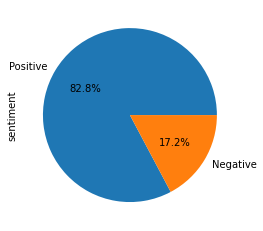

In [85]:
amazon.sentiment.value_counts().plot.pie(autopct="%.1f%%")

In amazon we alomost have 83% positive sentiment

# FLIPKART

In [86]:
flipkart["polarity"] = flipkart['text'].apply(pol)
flipkart["sentiment"] = np.where(flipkart["polarity"] >= 0 ,"Positive","Negative")
flipkart.head()

,text,polarity,sentiment
0,suspend pin code,0.0,Positive
1,day know slipper go refund th,0.0,Positive
2,receive refund money back order,0.0,Positive
3,order response product still today,0.0,Positive
4,elate welcome eminent speaker exclusive th edi...,0.4,Positive


<AxesSubplot:ylabel='sentiment'>

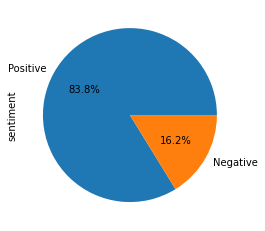

In [87]:
flipkart.sentiment.value_counts().plot.pie(autopct="%.1f%%")

In flipkart we have 84% positive sentiment

# SNAPDEAL

In [88]:
snapdeal["polarity"] = snapdeal['text'].apply(pol)
snapdeal["sentiment"] = np.where(snapdeal["polarity"] >= 0 ,"Positive","Negative")
snapdeal.head()

,text,polarity,sentiment
0,amaze range hair available shop a,0.4,Positive
1,sky dont know,0.0,Positive
2,turnover,0.0,Positive
3,hi please private message us contact number li...,0.0,Positive
4,login old mobile attach old number,0.1,Positive


<AxesSubplot:ylabel='sentiment'>

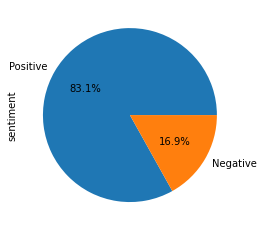

In [89]:
snapdeal.sentiment.value_counts().plot.pie(autopct="%.1f%%")

In snapdeal we have 83% positive sentiment 

CONCLUSION : ALL THE E-COMMERCE SITES AMAZON,FLIPKART,SNAPDEAL HAVE 83% OF POSITIVE SENTIMENT